# Heart Disease Prediction 

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
# importing all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy import stats 
plt.style.use("fivethirtyeight")


import sklearn.model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data= pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Data Wrangling

In [3]:
data.shape

(918, 12)

In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
#Dataset does not have any missing data
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Visualizing the data - EDA

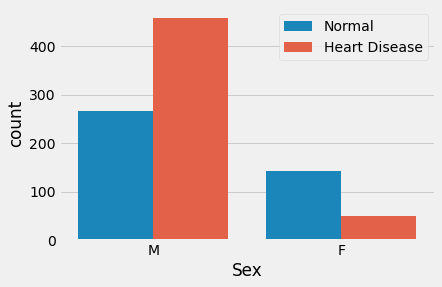

In [9]:
sns.countplot(x="Sex", data=data, hue="HeartDisease")
plt.legend(['Normal', 'Heart Disease'])
plt.show()

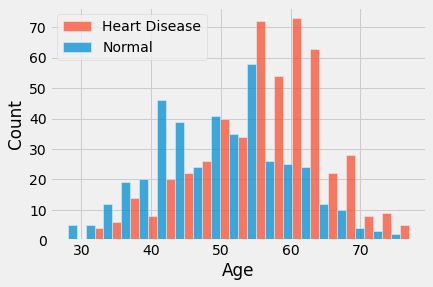

In [10]:
sns.histplot(x="Age", data=data, hue="HeartDisease", multiple='dodge')
plt.legend(['Heart Disease', 'Normal'])
plt.show()

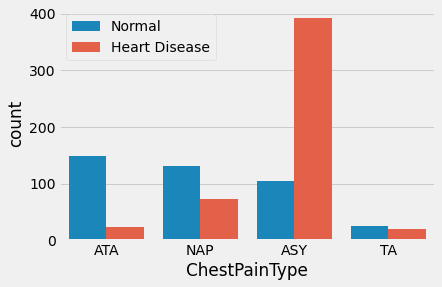

In [11]:
sns.countplot(x="ChestPainType", data=data, hue="HeartDisease")
plt.legend(['Normal', 'Heart Disease'])
plt.show()

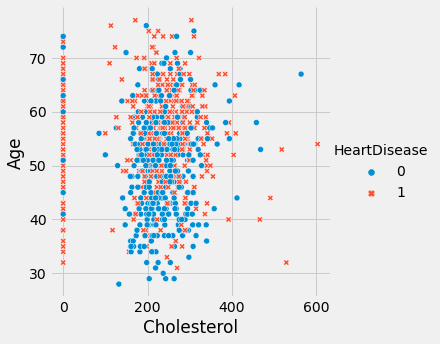

In [12]:
sns.relplot(x="Cholesterol", y="Age", data=data, kind="scatter", hue='HeartDisease', style= 'HeartDisease')
plt.show()

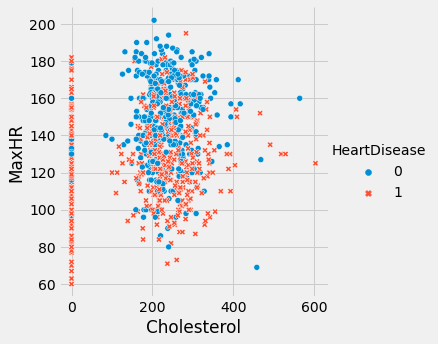

In [13]:
sns.relplot(x="Cholesterol", y="MaxHR", data=data, kind="scatter", hue='HeartDisease', style= 'HeartDisease')
plt.show()

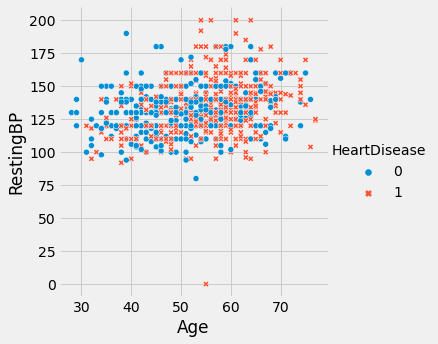

In [14]:
sns.relplot(x="Age", y="RestingBP", data=data, kind="scatter", hue='HeartDisease', style= 'HeartDisease')
plt.show()

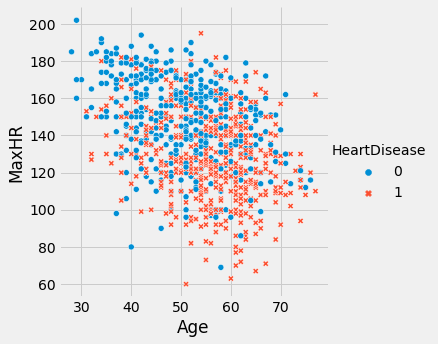

In [15]:
sns.relplot(x="Age", y="MaxHR", data=data, kind="scatter", hue='HeartDisease', style= 'HeartDisease')
plt.show()

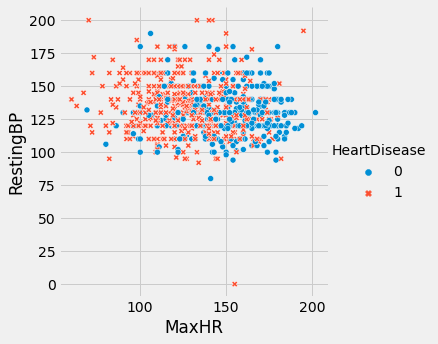

In [16]:
sns.relplot(x="MaxHR", y="RestingBP", data=data, kind="scatter", hue='HeartDisease', style= 'HeartDisease')
plt.show()

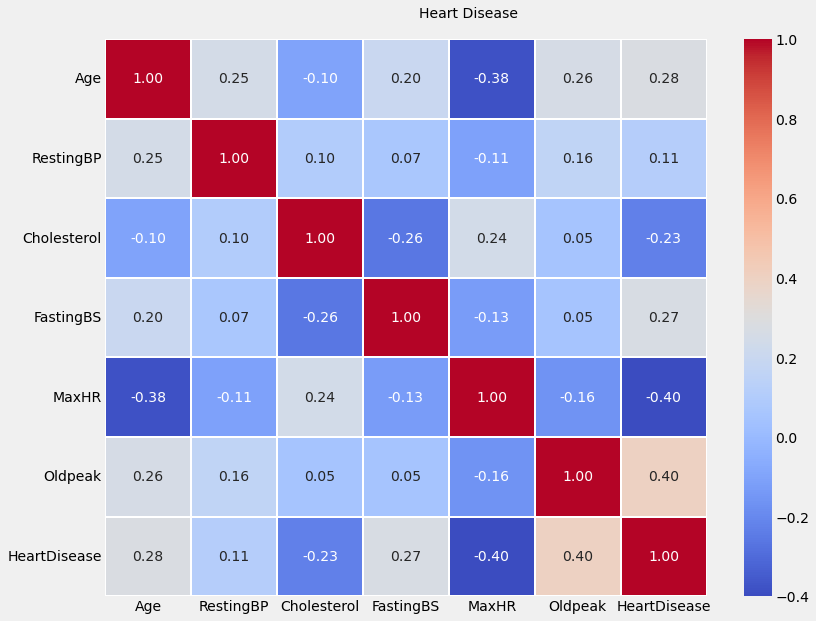

In [17]:
# checking the correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart Disease', fontsize=14)

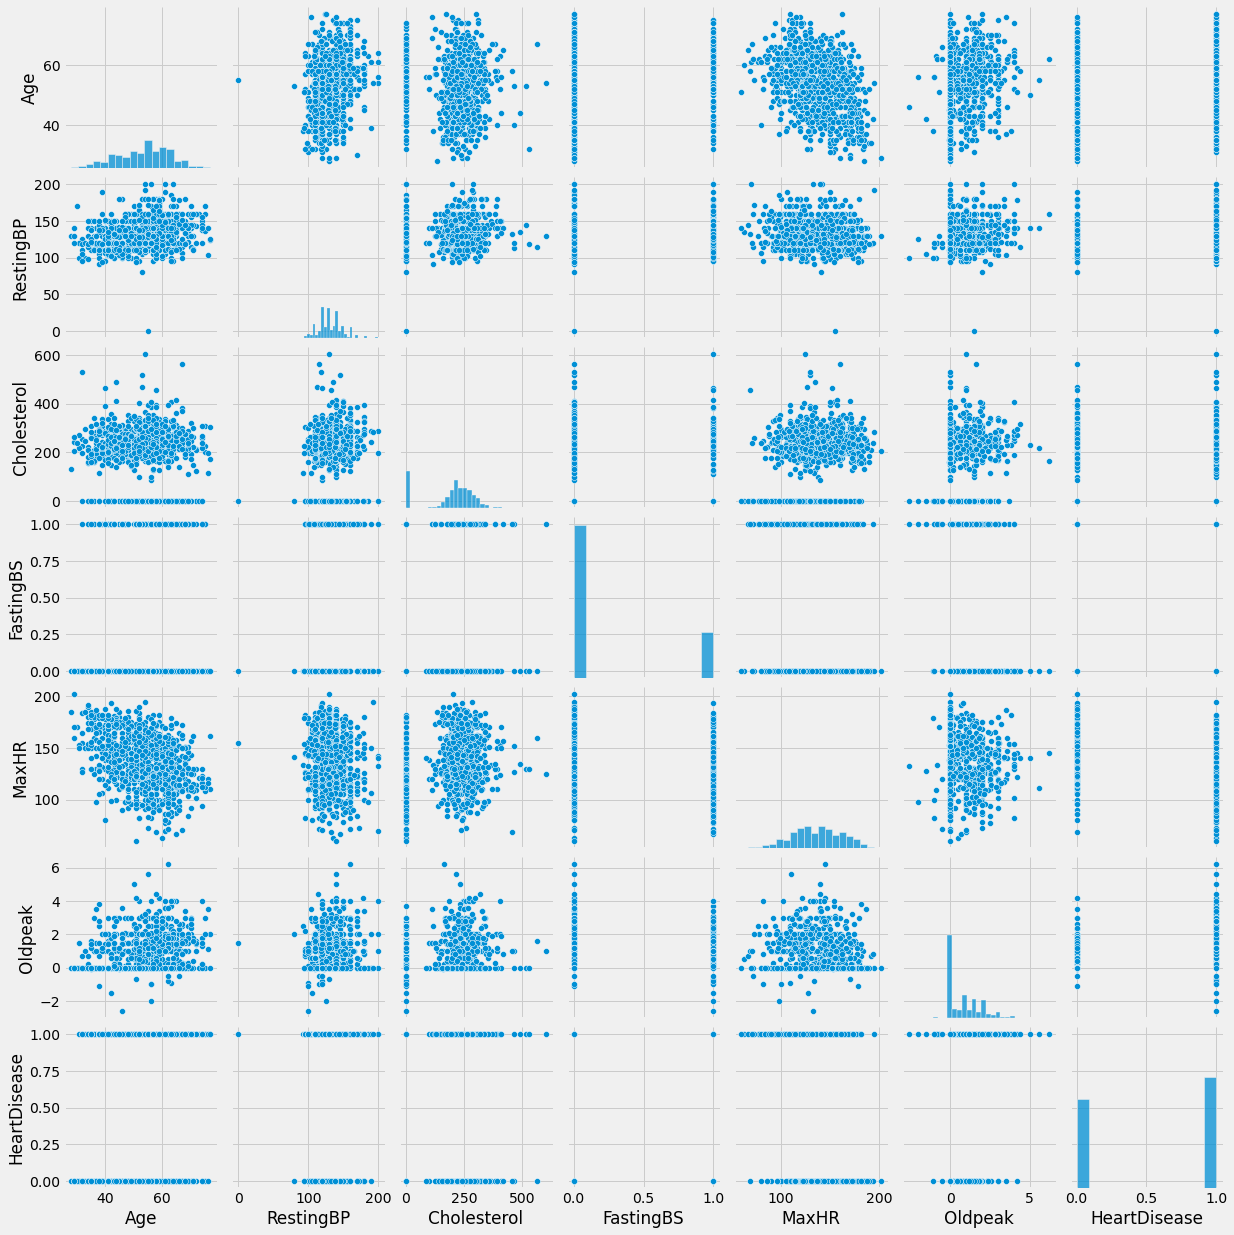

In [18]:
sns.pairplot(data,  palette='Set1')
plt.show()

### Preprocessing

In [19]:
data['FastingBS'] = data['FastingBS'].astype('object')

In [20]:
numerical_features = data.select_dtypes(include="number").columns.tolist() 
categorical_features = data.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features, compact=True) 
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical features:
['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
 'ST_Slope']


In [21]:
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [22]:
data[categorical_features].describe().T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [23]:
for feature in categorical_features:
    print(data[feature].value_counts())
    print ('------')

M    725
F    193
Name: Sex, dtype: int64
------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------
0    704
1    214
Name: FastingBS, dtype: int64
------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
------


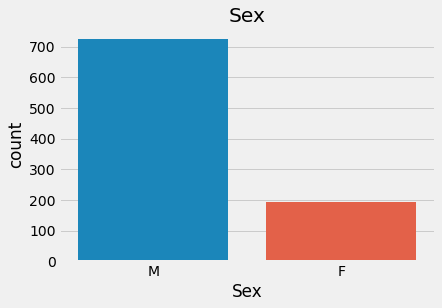

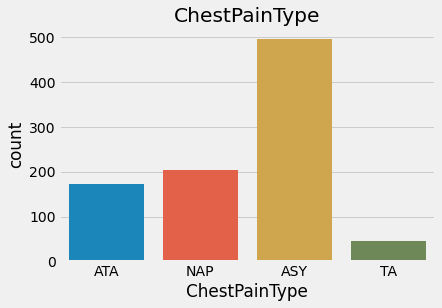

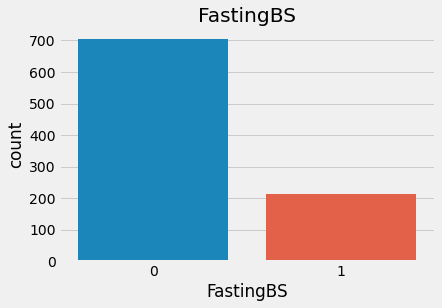

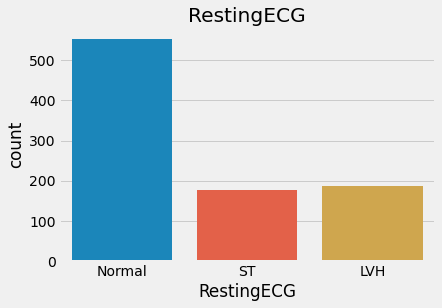

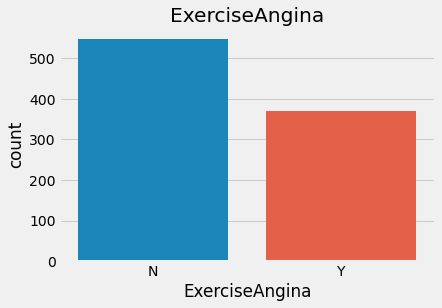

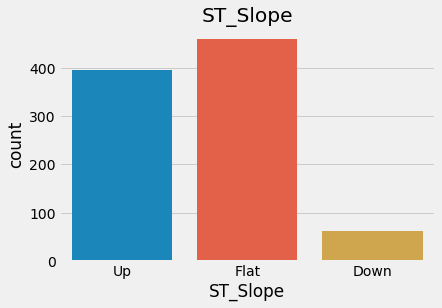

In [24]:
#visualizing categorical features
data_categoric = data.loc[:, categorical_features]
for i in categorical_features:
    plt.figure()
    sns.countplot(x = i, data = data_categoric)
    plt.title(i)

### Creating Dummies for Categorical Features

In [25]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
 'ST_Slope']
df = pd.get_dummies(data, columns = categorical_features)
print('The data have ', df.shape[0], ' rows and ', df.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df.columns)))

The data have  918  rows and  22  columns

column names: 

Age
RestingBP
Cholesterol
MaxHR
Oldpeak
HeartDisease
Sex_F
Sex_M
ChestPainType_ASY
ChestPainType_ATA
ChestPainType_NAP
ChestPainType_TA
FastingBS_0
FastingBS_1
RestingECG_LVH
RestingECG_Normal
RestingECG_ST
ExerciseAngina_N
ExerciseAngina_Y
ST_Slope_Down
ST_Slope_Flat
ST_Slope_Up


In [26]:
class_counts = df['HeartDisease'].value_counts()
class_counts

1    508
0    410
Name: HeartDisease, dtype: int64

In [27]:
type(class_counts)

pandas.core.series.Series

In [28]:
class_percentages = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    55.337691
1    44.662309
dtype: float64

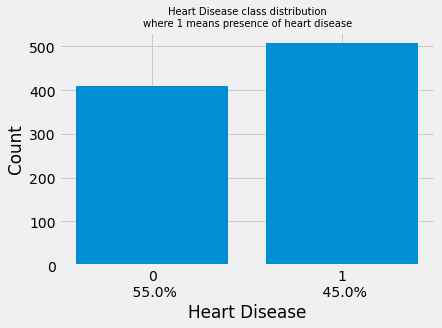

In [29]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Heart Disease')
ax.set_title('Heart Disease class distribution\nwhere 1 means presence of heart disease',
              fontsize = 10)
plt.show()

No significant imbalance issue was identified in the dataset

<Figure size 576x360 with 0 Axes>

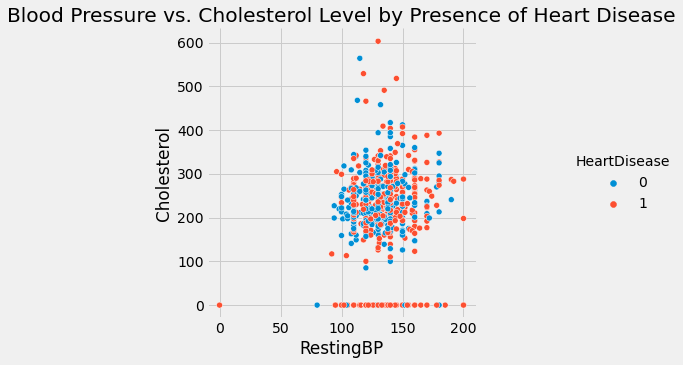

In [30]:
plt.figure(figsize=(8,5))
sns.relplot(x='RestingBP', y='Cholesterol', data=df, kind="scatter", hue='HeartDisease')
plt.title('Blood Pressure vs. Cholesterol Level by Presence of Heart Disease')
plt.show()

### Data Split for Logistic Regression with only Two Variables

In [31]:
# Split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = df[['Cholesterol','RestingBP']]
y = data['HeartDisease']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(734, 2)
(734,)
(92, 2)
(92,)
(92, 2)
(92,)


(None, None)

### Logistic Regression Classifier with Two Variables

In [32]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)

In [33]:
# Logistic Regression
classifier.fit(X_train, y_train)

y_pred_log_train= classifier.predict(X_train)
y_pred_log_valid= classifier.predict(X_valid)
y_pred_log_test = classifier.predict(X_test)

print("Classification Report for Training Data")
print(classification_report(y_train, y_pred_log_train))
print("Classification Report for Validation Data")
print(classification_report(y_valid, y_pred_log_valid))
print("Classification Report for Test Data")
print(classification_report(y_test, y_pred_log_test))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.53      0.43      0.47       327
           1       0.60      0.69      0.64       407

    accuracy                           0.57       734
   macro avg       0.56      0.56      0.56       734
weighted avg       0.57      0.57      0.57       734

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.62      0.34      0.44        47
           1       0.53      0.78      0.63        45

    accuracy                           0.55        92
   macro avg       0.57      0.56      0.53        92
weighted avg       0.57      0.55      0.53        92

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        36
           1       0.75      0.79      0.77        56

    accuracy                           0.71        92
   macro a

Models will be evaluated by using Accuracy, Precision, Recall, F1 scores, Roc-Auc and confusion matrix. Data has a significant imbalance issue and we can not take the risk of classifying false negatives, recall score will be our main metric to evaluate the model performance.

In [34]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

#train data
# recall: tp / (tp + fn)
recall = recall_score(y_train, y_pred_log_train)
print('Recall for Train Data: %f' % recall)

print('----------------------------------')

#Validation data
# recall: tp / (tp + fn)
recall = recall_score(y_valid, y_pred_log_valid)
print('Recall for Validation Data: %f' % recall)

print('----------------------------------')

#test data
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_log_test)
print('Recall for Test Data: %f' % recall)

Recall for Train Data: 0.692875
----------------------------------
Recall for Validation Data: 0.777778
----------------------------------
Recall for Test Data: 0.785714


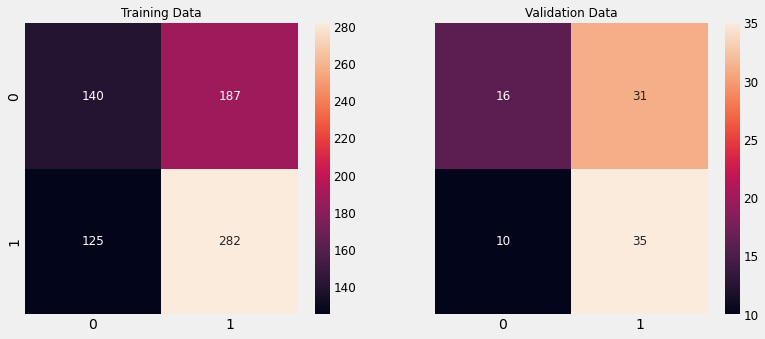

In [35]:
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(12, 5))
plt.rcParams.update({'font.size': 12})
#Plotting confusion matrix for the different models for the Training and Test Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, y_pred_log_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data', fontsize=12)

plot_1 = sns.heatmap((metrics.confusion_matrix(y_valid, y_pred_log_valid)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Validation Data', fontsize=12);

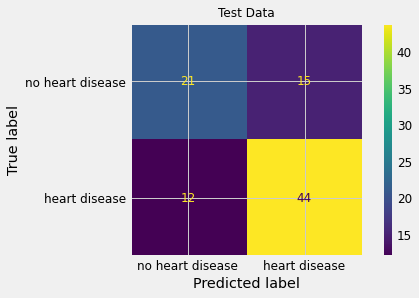

In [36]:
cm = confusion_matrix(y_test, y_pred_log_test, labels = classifier.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_title('Test Data', fontsize=12)
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 12)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 12)
display_cm.plot(ax = ax)

### Logistic Regression with All Variables in the Dataset

In [37]:
X = df.drop(columns = ['HeartDisease'])
print("X: ", type(X), X.shape)

y = data['HeartDisease']
print("y: ", type(y), y.shape)

list(X.columns)

X:  <class 'pandas.core.frame.DataFrame'> (918, 21)
y:  <class 'pandas.core.series.Series'> (918,)


['Age',
 'RestingBP',
 'Cholesterol',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'FastingBS_0',
 'FastingBS_1',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [38]:
# Split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

# In the first step we will split the data in training and remaining dataset
X_train_lr, X_rem_lr, y_train_lr, y_rem_lr = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid_lr, X_test_lr, y_valid_lr, y_test_lr = train_test_split(X_rem_lr,y_rem_lr, test_size=0.5)


print('Training split has ', X_train_lr.shape[0], ' rows\n', 'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_train_lr))+ ')')
print('Validation split has ', X_valid_lr.shape[0], ' rows\n', 'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_valid_lr))+ ')')
print('Test split has ', X_test_lr.shape[0], ' rows\n', 'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_test_lr)) + ')')

Training split has  734  rows
 and the corresponding labels have an equal number of values. (734)
Validation split has  92  rows
 and the corresponding labels have an equal number of values. (92)
Test split has  92  rows
 and the corresponding labels have an equal number of values. (92)


In [39]:
# Logistic Regression
classifier.fit(X_train_lr, y_train_lr)

y_pred_log_train_lr= classifier.predict(X_train_lr)
y_pred_log_valid_lr= classifier.predict(X_valid_lr)
y_pred_log_test_lr = classifier.predict(X_test_lr)

print("Classification Report for Train Data")
print(classification_report(y_train_lr, y_pred_log_train_lr))
print("Classification Report for Validation Data")
print(classification_report(y_valid_lr, y_pred_log_valid_lr))
print("Classification Report for Test Data")
print(classification_report(y_test_lr, y_pred_log_test_lr))

Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       322
           1       0.87      0.89      0.88       412

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        49
           1       0.82      0.95      0.88        43

    accuracy                           0.88        92
   macro avg       0.89      0.88      0.88        92
weighted avg       0.89      0.88      0.88        92

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.91      0.92      0.92        53

    accuracy                           0.90        92
   macro avg 

In [40]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

#train data
# recall: tp / (tp + fn)
recall = recall_score(y_train_lr, y_pred_log_train_lr)
print('Recall for Train Data: %f' % recall)

print('----------------------------------')

#Validation data
# recall: tp / (tp + fn)
recall = recall_score(y_valid_lr, y_pred_log_valid_lr)
print('Recall for Validation Data: %f' % recall)

print('----------------------------------')

#test data
# recall: tp / (tp + fn)
recall = recall_score(y_test_lr, y_pred_log_test_lr)
print('Recall for Test Data: %f' % recall)

Recall for Train Data: 0.890777
----------------------------------
Recall for Validation Data: 0.953488
----------------------------------
Recall for Test Data: 0.924528


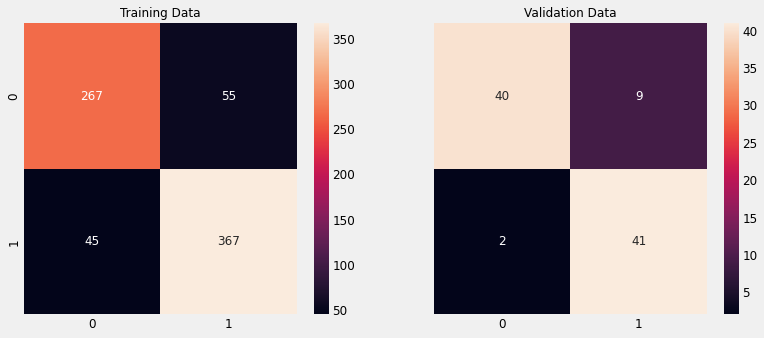

In [41]:
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False, figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
#Plotting confusion matrix for the different models for the Training and Test Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_lr, y_pred_log_train_lr)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data', fontsize=12)

plot_1 = sns.heatmap((metrics.confusion_matrix(y_valid_lr, y_pred_log_valid_lr)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Validation Data', fontsize=12);

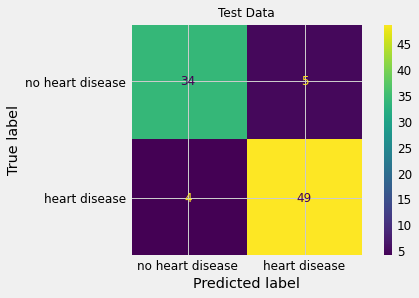

In [42]:
cm = confusion_matrix(y_test_lr, y_pred_log_test_lr, labels = classifier.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_title('Test Data', fontsize=12)
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 12)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 12)
display_cm.plot(ax = ax)

### Recall Score Evaluation

In [43]:
# multiple splits and the effects

training_recall = []
test_recall = []
recall_difference = []
#
# define number of trials
#
n_splits = 25
#
# define LogisticRegression object
#
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
#
# loop over multiple trials
#
for i in range(0, n_splits):
#
# perform a split for this iteration, 
# using different random_state for every iteration
# this ensures each split is likely to be unique
#
    X_train_lr, X_rem_lr, y_train_lr, y_rem_lr = train_test_split(X, y, stratify = y, random_state = i)
#    
# fit the Classifier on the training set
#
    classifier.fit(X_train_lr, y_train_lr)
#
# predict the labels for the training data
#
    y_predict_log_train_lr = classifier.predict(X_train_lr)
#
# predict the labels for the test data
#
    y_predict_log_test_lr = classifier.predict(X_rem_lr)
#
# save training set recall for this split
#
    tr_recall = recall_score(y_predict_log_train_lr, y_train_lr)
    training_recall.append(tr_recall)
#
# save test set recall for this split
#
    tst_recall = recall_score(y_predict_log_test_lr, y_rem_lr)
    test_recall.append(tst_recall)
#
# save difference between the two recall values
#
    recall_difference.append(tst_recall - tr_recall)

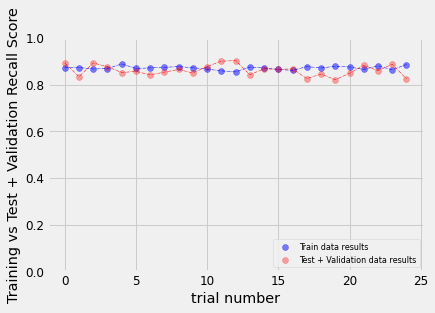

In [44]:
fig, ax = plt.subplots()
ax.scatter(range(len(training_recall)),
           training_recall, 
           color = 'blue', 
           alpha = 0.5,
           label = 'Train data results')
ax.plot(range(len(training_recall)),
        training_recall, 
        color = 'blue', 
        linestyle = '-.',
        linewidth = 0.5)
ax.scatter(range(len(test_recall)),
           test_recall, 
           color = 'red', 
           alpha = 0.35, 
           label = 'Test + Validation data results')
ax.plot(range(len(test_recall)),
        test_recall, 
        color = 'red', 
        linestyle = '-.',
        linewidth = 0.5)
ax.legend(fontsize = 8, loc = "lower right")
ax.set_ylabel('Training vs Test + Validation Recall Score')
ax.set_ylim(0, 1)
ax.set_xlabel('trial number')
plt.show()

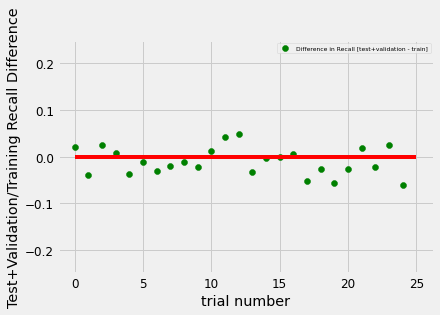

In [45]:
fig, ax = plt.subplots()
ax.scatter(range(len(recall_difference)),
           recall_difference, 
           color = 'green', 
           label = 'Difference in Recall [test+validation - train]')
ax.plot([0, len(recall_difference)], [0, 0], 'red')
ax.legend(fontsize = 6)
ax.set_ylabel('Test+Validation/Training Recall Difference')
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel('trial number')
plt.show()

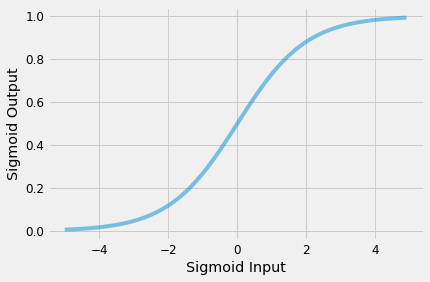

In [50]:
h = lambda z: 1. / (1 + np.exp(-z))
zs = np.arange(-5, 5, 0.1)
fig, ax = plt.subplots()
ax.plot(zs, h(zs), alpha=0.5)
ax.set_ylabel('Sigmoid Output')
ax.set_xlabel('Sigmoid Input')
plt.show()

### Model Optimization - Logistic Regression

In [46]:
def cv_score(classifier, x, y, score_func = recall_score):
    result = 0
    nfold = 5
    x.reset_index(drop = True, inplace = True)
    y.index = x.index
    for train, test in KFold(nfold, shuffle = True,
                             random_state = 42).split(x):
        classifier.fit(x.loc[train, :], y[train])
        result += score_func(classifier.predict(x.loc[test, :]), y[test])
    return result / nfold

In [47]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# your turn
def tune_Cs(x, y, Cs=[0.001, 0.1, 1, 10, 100], score_func=recall_score):
    Cs = Cs
    cscores = np.empty(len(Cs))
    for i, C in enumerate(Cs):
        classifier = LogisticRegression(C=C)
        avg_score = cv_score(classifier, x, y, score_func=score_func)
        cscores[i] = avg_score
    maxC = Cs[np.argmax(cscores)]
    print("Best C is", maxC)
    return cscores

tune_Cs(X_train_lr, y_train_lr)

Best C is 1


array([0.7316615 , 0.8753049 , 0.87592537, 0.87592537, 0.87592537])

In [48]:
classifier = LogisticRegression(C=1)
classifier.fit(X_train_lr, y_train_lr)
print(recall_score(classifier.predict(X_test_lr), y_test_lr))

0.9090909090909091


In [49]:
classifier = sklearn.model_selection.GridSearchCV(LogisticRegression(), {'C': Cs}, cv=5)
classifier.fit(X_train_lr, y_train_lr)
print("Train score:", classifier.score(X_train_lr, y_train_lr))
print("Validation score", classifier.score(X_valid_lr, y_valid_lr))
print("Test score:", classifier.score(X_test_lr, y_test_lr))
classifier.best_params_

Train score: 0.875
Validation score 0.8804347826086957
Test score: 0.9130434782608695


{'C': 1}

### Preprocessing Data for Decision Tree Model

In [51]:
df_dt = pd.read_csv('heart.csv')

In [52]:
df_modelling = df_dt.copy()

In [53]:
df_dt['FastingBS'] = df_dt['FastingBS'].astype('object')
df_dt['HeartDisease'] = df_dt['HeartDisease'].astype('object')

In [54]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = df_dt.select_dtypes(include="object").columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical features:
['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
 'ST_Slope', 'HeartDisease']


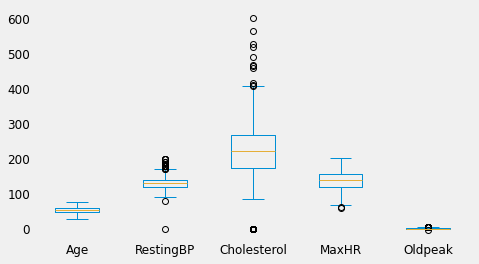

In [55]:
df_dt[numerical_features].plot(kind="box", figsize=(7, 4))
plt.grid(False)
plt.show()

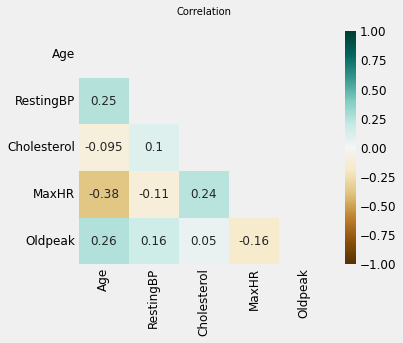

In [56]:
plt.figure(figsize=(5, 4))
mask = np.triu(np.ones_like(df_dt.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_dt.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation', fontdict={'fontsize':10}, pad=16);

### Data Split

In [57]:
df_modelling['FastingBS'] = df_modelling['FastingBS'].astype('object')

In [58]:
X = df_modelling.drop(columns=["HeartDisease"])
y = df_modelling["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5, stratify=y_test, random_state=101)


print(f"training size: {X_train.shape[0]} ({100*X_train.shape[0] / X.shape[0]:.3f}%)")
print(f"validation size: {X_val.shape[0]} ({100*X_val.shape[0] / X.shape[0]:.3f}%)")
print(f"test size: {X_test.shape[0]} ({100*X_test.shape[0] / X.shape[0]:.3f}%)")

training size: 734 (79.956%)
validation size: 92 (10.022%)
test size: 92 (10.022%)


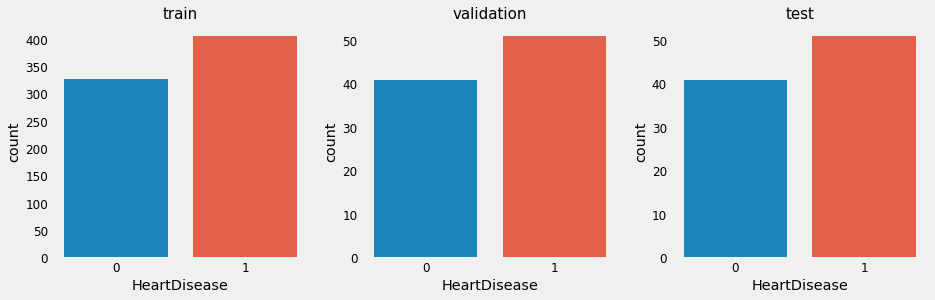

In [59]:
fig, axis = plt.subplots(1, 3, figsize=(14, 4))

for idx, label in enumerate([
    (y_train, "train"), (y_val, "validation"), (y_test, "test")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1], fontsize= 15)
    axis[idx].grid(False)
plt.show()

In [60]:
#deeper investigation of categorical features
nominal_features = ["Sex", "ChestPainType", "ST_Slope"]
ordinal_features = X.select_dtypes(
    include="object"
).drop(columns=nominal_features).columns.tolist()

print("nominal features:", nominal_features)
print("ordinal features:")
pprint(ordinal_features, compact=True)

nominal features: ['Sex', 'ChestPainType', 'ST_Slope']
ordinal features:
['FastingBS', 'RestingECG', 'ExerciseAngina']


### Encoding the Data

In [61]:
onehot = OneHotEncoder()
onehot.fit(X_train[nominal_features])
X_train_onehot = pd.DataFrame(
    onehot.transform(X_train[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_val_onehot = pd.DataFrame(
    onehot.transform(X_val[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_test_onehot = pd.DataFrame(
    onehot.transform(X_test[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
print("one-hot matrix:")
display(X_train_onehot)

ordinal = OrdinalEncoder()
ordinal.fit(X_train[ordinal_features])
X_train_ordinal = pd.DataFrame(ordinal.transform(X_train[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_val_ordinal = pd.DataFrame(
    ordinal.transform(X_val[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_test_ordinal = pd.DataFrame(
    ordinal.transform(X_test[ordinal_features]),
    columns=ordinal.feature_names_in_
)
print("ordinal matrix:")
display(X_train_ordinal)

one-hot matrix:


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
729,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
730,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
731,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
732,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


ordinal matrix:


,FastingBS,RestingECG,ExerciseAngina
0,0.0,2.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
729,0.0,1.0,0.0
730,1.0,1.0,0.0
731,0.0,1.0,1.0
732,0.0,2.0,1.0


In [62]:
X_train_combined = pd.concat([X_train[numerical_features].reset_index(drop=True), X_train_onehot, X_train_ordinal], axis=1)
X_val_combined = pd.concat([X_val[numerical_features].reset_index(drop=True), X_val_onehot, X_val_ordinal], axis=1)
X_test_combined = pd.concat([X_test[numerical_features].reset_index(drop=True), X_test_onehot, X_test_ordinal], axis=1)

X_train_combined.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS,RestingECG,ExerciseAngina
0,43,120,291,155,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
1,56,130,184,100,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,52,160,196,165,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,58,100,248,122,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,45,130,237,170,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Scaling the Data

In [63]:
scaler = StandardScaler()
scaler.fit(X_train_combined)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_combined),
    columns=X_train_combined.columns
)
X_val_scaled = pd.DataFrame(
    scaler.transform(X_val_combined),
    columns=X_val_combined.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_combined),
    columns=X_test_combined.columns
)

with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS,RestingECG,ExerciseAngina
0,-1.116659,-0.648106,0.845479,0.739554,-0.847637,-0.504679,0.504679,-1.106455,-0.487621,-0.519515,4.608950,-0.267456,1.016485,-0.888957,-0.553218,1.602009,-0.850297
1,0.278543,-0.120068,-0.118843,-1.414388,-0.847637,-0.504679,0.504679,-1.106455,2.050774,-0.519515,-0.216969,-0.267456,-0.983783,1.124914,-0.553218,0.000000,-0.850297
2,-0.150750,1.464048,-0.010695,1.131179,-0.847637,-0.504679,0.504679,-1.106455,2.050774,-0.519515,-0.216969,-0.267456,-0.983783,1.124914,-0.553218,0.000000,-0.850297
3,0.493190,-1.704183,0.457948,-0.552811,0.107630,1.981458,-1.981458,0.903787,-0.487621,-0.519515,-0.216969,-0.267456,1.016485,-0.888957,-0.553218,-1.602009,-0.850297
4,-0.902012,-0.120068,0.358812,1.326992,-0.847637,1.981458,-1.981458,-1.106455,2.050774,-0.519515,-0.216969,-0.267456,-0.983783,1.124914,-0.553218,0.000000,-0.850297


### Modeling

In [64]:
model_dt = DecisionTreeClassifier(random_state=11)

model_dt.fit(X_train_scaled.astype(int), y_train.astype(int))

preds_train = model_dt.predict(X_train_scaled) # training data
preds_val = model_dt.predict(X_val_scaled) # validation data
preds_test = model_dt.predict(X_test_scaled) # testing data

In [65]:
print("train prediction samples:\n", preds_train[:20])
print("train target samples:\n", y_train[:20].tolist())

train prediction samples:
 [0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1]
train target samples:
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]


In [66]:
print("validation prediction samples:\n", preds_val[:20])
print("validation target samples:\n", y_val[:20].tolist())

validation prediction samples:
 [1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
validation target samples:
 [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1]


In [67]:
print("test prediction samples:\n", preds_test[:20])
print("test target samples:\n", y_test[:20].tolist())

test prediction samples:
 [1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1]
test target samples:
 [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


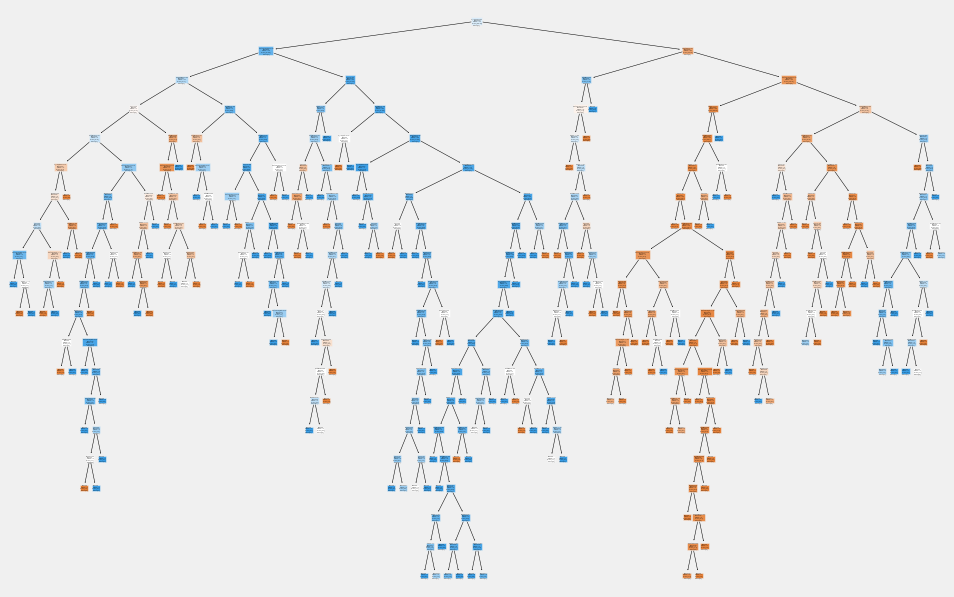

In [68]:
plt.figure(figsize=(15, 10))
plot_tree(
    model_dt,
    feature_names=model_dt.feature_names_in_,
    class_names=True,
    filled=True,
)
plt.show()

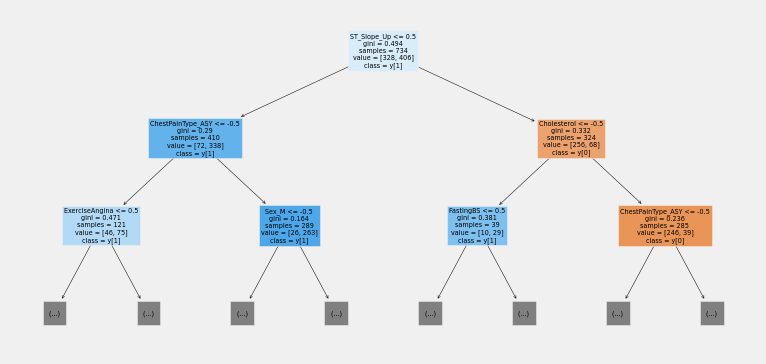

In [69]:
plt.figure(figsize=(12, 6))
plot_tree(model_dt,feature_names = model_dt.feature_names_in_,  max_depth=2, class_names=True,
    filled=True,)
plt.show()

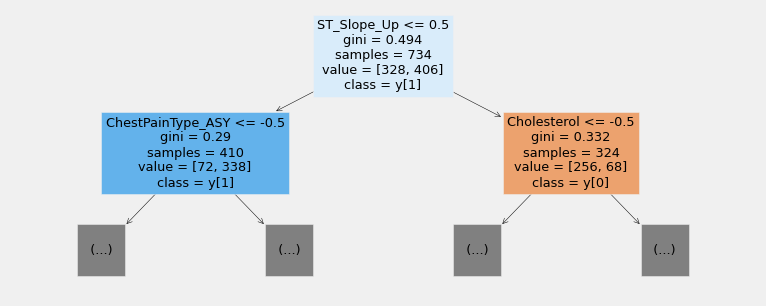

In [70]:
plt.figure(figsize=(12, 5))
plot_tree(model_dt, feature_names = model_dt.feature_names_in_,  max_depth=1, class_names=True,
    filled=True)
plt.show()

### Model Evaluation

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.90      0.89      0.90       406

    accuracy                           0.89       734
   macro avg       0.89      0.89      0.89       734
weighted avg       0.89      0.89      0.89       734



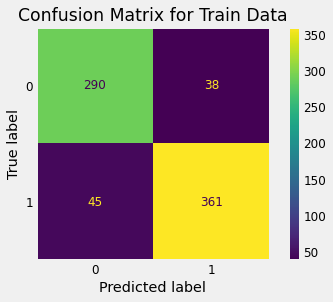

In [72]:
print(classification_report(y_train, preds_train))

ConfusionMatrixDisplay.from_predictions(y_train, preds_train)
plt.title("Confusion Matrix - Train Data")
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.84      0.75      0.79        51

    accuracy                           0.78        92
   macro avg       0.78      0.79      0.78        92
weighted avg       0.79      0.78      0.78        92



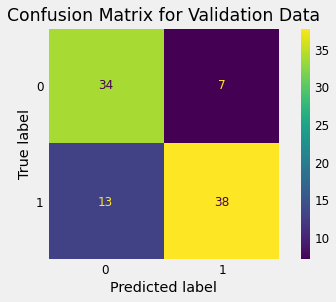

In [73]:
print(classification_report(y_val, preds_val))

ConfusionMatrixDisplay.from_predictions(y_val, preds_val)
plt.title("Confusion Matrix - Validation Data")
plt.grid(False)
plt.show()


              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.84      0.80      0.82        51

    accuracy                           0.80        92
   macro avg       0.80      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



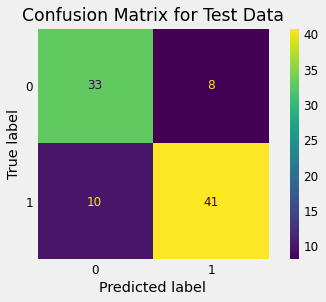

In [74]:
print(classification_report(y_test, preds_test))

ConfusionMatrixDisplay.from_predictions(y_test, preds_test)
plt.title("Confusion Matrix - Test Data")
plt.grid(False)
plt.show()

In [84]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

#train data
# recall: tp / (tp + fn)
recall = recall_score(y_train, preds_train)
print('Recall for Train Data: %f' % recall)

print('----------------------------------')

#Validation data
# recall: tp / (tp + fn)
recall = recall_score(y_val, preds_val)
print('Recall for Validation Data: %f' % recall)

print('----------------------------------')

#test data
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds_test)
print('Recall for Test Data: %f' % recall)

Recall for Train Data: 0.889163
----------------------------------
Recall for Validation Data: 0.745098
----------------------------------
Recall for Test Data: 0.803922


### Selecting the Best Feature

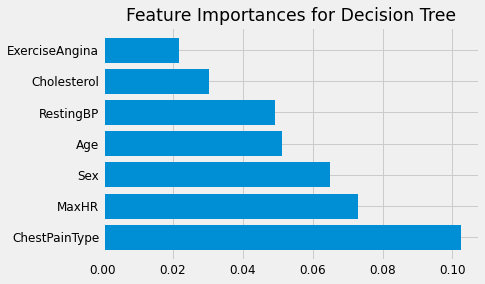

In [75]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature Importances for Decision Tree')
    plt.show()

features_names = list(df_modelling.columns)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(model_dt.feature_importances_), features_names, top=7)

### SGD Classifier

In [85]:
X = df.drop(columns = ['HeartDisease'])
y = data['HeartDisease']

In [86]:
# Split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

# In the first step we will split the data in training and remaining dataset
X_train_sgd, X_rem_sgd, y_train_sgd, y_rem_sgd = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid_sgd, X_test_sgd, y_valid_sgd, y_test_sgd = train_test_split(X_rem_sgd,y_rem_sgd, test_size=0.5)


print('Training split has ', X_train_sgd.shape[0], ' rows\n', 'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_train_sgd))+ ')')
print('Validation split has ', X_valid_sgd.shape[0], ' rows\n', 'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_valid_sgd))+ ')')
print('Test split has ', X_test_sgd.shape[0], ' rows\n', 'and the corresponding labels have an equal number of values.', 
      '(' + str(len(y_test_sgd)) + ')')

Training split has  734  rows
 and the corresponding labels have an equal number of values. (734)
Validation split has  92  rows
 and the corresponding labels have an equal number of values. (92)
Test split has  92  rows
 and the corresponding labels have an equal number of values. (92)


In [89]:
# SGD Classifier (Stochastic Gradient Descent) 
#Linear support vector machine
from sklearn.linear_model import SGDClassifier
classifier_sgd = SGDClassifier()

classifier_sgd.fit(X_train_sgd, y_train_sgd)

y_pred_sgd_train = classifier_sgd.predict(X_train_sgd)
y_pred_sgd_valid = classifier_sgd.predict(X_valid_sgd)
y_pred_sgd_test = classifier_sgd.predict(X_test_sgd)

print(classification_report(y_train_sgd, y_pred_sgd_train))
print(classification_report(y_valid_sgd, y_pred_sgd_valid))
print(classification_report(y_test_sgd, y_pred_sgd_test))

              precision    recall  f1-score   support

           0       0.87      0.27      0.42       332
           1       0.62      0.97      0.75       402

    accuracy                           0.65       734
   macro avg       0.74      0.62      0.58       734
weighted avg       0.73      0.65      0.60       734

              precision    recall  f1-score   support

           0       0.73      0.26      0.39        42
           1       0.60      0.92      0.72        50

    accuracy                           0.62        92
   macro avg       0.67      0.59      0.56        92
weighted avg       0.66      0.62      0.57        92

              precision    recall  f1-score   support

           0       0.81      0.36      0.50        36
           1       0.70      0.95      0.80        56

    accuracy                           0.72        92
   macro avg       0.75      0.65      0.65        92
weighted avg       0.74      0.72      0.68        92



In [88]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

#train data
# recall: tp / (tp + fn)
recall = recall_score(y_train_sgd, y_pred_sgd_train)
print('Recall for Train Data: %f' % recall)

print('----------------------------------')

#Validation data
# recall: tp / (tp + fn)
recall = recall_score(y_valid_sgd, y_pred_sgd_valid)
print('Recall for Validation Data: %f' % recall)

print('----------------------------------')

#test data
# recall: tp / (tp + fn)
recall = recall_score(y_test_sgd, y_pred_sgd_test)
print('Recall for Test Data: %f' % recall)

Recall for Train Data: 0.243781
----------------------------------
Recall for Validation Data: 0.240000
----------------------------------
Recall for Test Data: 0.357143


### Findings

According to the descriptive statistics;
- A greater proportion of male patients have heart disease than female patients. 
- In terms of the age distribution, as expected, heart disease is more common among the older patients. 
- More patients who experience exercise-induced angina have heart disease than those who did not experience any angina. 
- Greater proportion of older patients who have high colesterol have heart disease than younger patients. 
- Greater proportion of the patients have Asymptomatic chest pain. greater proportion of the patents who have asymptotic chest pain have heart disease.
- Atypical angina is more common among the patients who have high cholesterol.

- The correlation matrix indicates that there is no strong correlation between any of the variables and heart disease. In addition to that the following notable relationships between variables:

    Moderately Strong Correlations:
    OldPeak and Heat Disease ==> (.40)
    MaxHR and Heart Disease ==> (-.40)
    
- There is no significant outlier and missing data in the dataset.

In conclusion, Logistic Regression gives the best result in terms of recall score. We achieved to get a recall score over 92% with Logistic Regression Classifier and we got 80% for Decision Tree.

Reference

Springboard: Course cases - Logistic Regression

https://www.kaggle.com/code/muliadea/classification-heart-disease-prediction

https://www.kaggle.com/code/mennatallahnasr/heart-disease-classification-with-many-models

https://www.kaggle.com/code/kevinwellington/heart-failure-prediction-1